In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3

import dask.dataframe as dd

# Data Acquisition

## Live Demos

In [78]:
 # books_data = pd.read_csv(
 #     "Books.csv",
 #     na_values=["Unknown","No rating"],
 #     header=None,names=["book_title",...])

In [83]:
books_data = pd.read_csv("Books.csv",na_values=["Unknown","No rating"])

In [27]:
books_data.head()

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
0,Fictional Points of View,Peter Lamarque,252.0,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
1,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802.0,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
2,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662.0,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
3,Library of Congress Subject Headings,Library of Congress,1512.0,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
4,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,248.0,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...


In [28]:
books_data.shape

(2049, 11)

In [74]:
type(books_data)

pandas.io.parsers.readers.TextFileReader

In [30]:
type(books_data.title)

pandas.core.series.Series

In [31]:

pd.DataFrame({
    "name":["Michael","Ivan"],
    "age":[20,12]
})

,name,age
0,Michael,20
1,Ivan,12


In [32]:
books_data.dtypes

title              object
author             object
pages             float64
genre              object
description        object
published_date     object
publisher          object
language           object
average_rating     object
ratings_count       int64
thumbnail          object
dtype: object

In [33]:
books_data.pages = books_data.pages.replace("Unknown",np.nan)


In [34]:
books_data.pages.astype(float)

0        252.0
1        802.0
2       1662.0
3       1512.0
4        248.0
         ...  
2044     256.0
2045     608.0
2046     512.0
2047     448.0
2048     256.0
Name: pages, Length: 2049, dtype: float64

In [35]:
books_data.published_date.str.len().value_counts()

published_date
10.0    1142
4.0      711
7.0      108
9.0        1
25.0       1
Name: count, dtype: int64

In [37]:
books_data[
books_data.published_date.str.len() ==25
]

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
1820,L'amore bugiardo,Gillian Flynn,528.0,Fiction,DA QUESTO LIBRO IL FILM DIRETTO DA DAVID FINCH...,2012-12-13T00:00:00+01:00,Rizzoli First,it,No rating,0,http://books.google.com/books/content?id=8eTf5...


In [39]:
books_data.average_rating

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2044    4.0
2045    4.1
2046    4.2
2047    4.0
2048    4.2
Name: average_rating, Length: 2049, dtype: float64

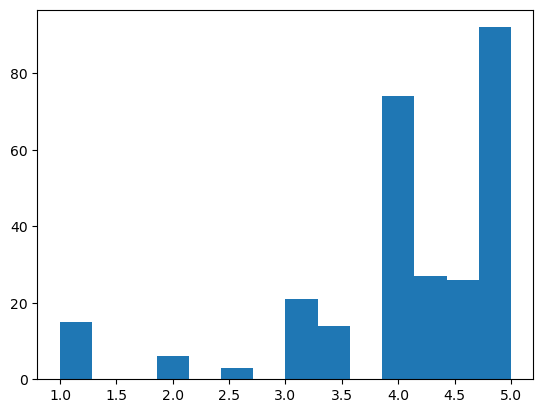

In [45]:
plt.hist(data=books_data,x="average_rating",bins="auto")
plt.show()

In [48]:
books_data.average_rating.value_counts()

average_rating
5.0    92
4.0    62
4.5    26
3.0    21
1.0    15
3.5    14
4.2    13
4.1    12
4.3    10
2.0     6
4.4     4
2.5     3
Name: count, dtype: int64

In [54]:
sum(books_data.average_rating.isna()) / len(books_data) *100

86.43240605173256

In [55]:
books_data.average_rating.skew()

-1.5865345534785174

In [ ]:
pd.read_excel(sheet_name= None)

In [62]:
con =sqlite3.connect("sqlite-sakila.db")


In [68]:
df = pd.read_sql_query("select * from film as f join language as l on f.language_id = l.language_id",con)
df.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,language_id,name,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,1,English,2021-03-06 15:51:48
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1,English,2021-03-06 15:51:48
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1,English,2021-03-06 15:51:48
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00,1,English,2021-03-06 15:51:48
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00,1,English,2021-03-06 15:51:48


<Axes: >

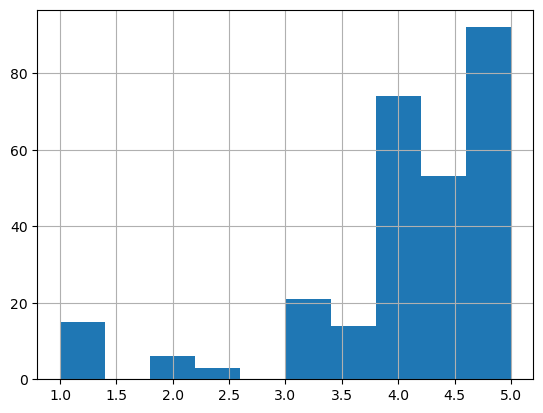

In [85]:
books_data.average_rating.hist()

In [92]:
languages = pd.read_sql_query("select * from language",con)

In [95]:
languages.loc[0:2].to_csv("languages/part1.csv")
languages.loc[2:4].to_csv("languages/part2.csv")
languages.loc[4:6].to_csv("languages/part3.csv")

In [101]:
dd.read_csv("languages/*").language_id.count().compute()

8

In [106]:
trip_data = pd.read_excel("green_tripdata_2015-09.xls",index_col=None)


pandas.core.frame.DataFrame

In [108]:
type(trip_data)
trip_data.head(5)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1


Creating a dataFrame

In [114]:
data = pd.DataFrame({'Yes':[10,13],'No':[13,14]})

In [116]:
data

,Yes,No
0,10,13
1,13,14


In [117]:
data_product = pd.DataFrame({'Bob':['I liked it','awlful'],'Mike':['sucks','kinda good']},index=['Product A','Product B'])

In [118]:
data_product

,Bob,Mike
Product A,I liked it,sucks
Product B,awlful,kinda good


In [119]:
pd.Series([30,35,40],index=["2016 time",'2015 time','2017'],name = "Product A")

2016 time    30
2015 time    35
2017         40
Name: Product A, dtype: int64

In [122]:
fruits = pd.DataFrame({'Apples':[30],'Bananas':[21]})

In [123]:
fruits

,Apples,Bananas
0,30,21


NameError: name 'reviews' is not defined